# Simulation

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2024-10-24

**Abstract**: This lecture will introduce the notion of simulation and
review the different types of simulation we might use to represent the
physical world.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

Last lecture Carl Henrik introduced you to some of the challenges of
approximate inference. Including the problem of mathematical
tractability. Before that he introduced you to a particular form of
model, the Gaussian process.

## notutils

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/notutils-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/notutils-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This small package is a helper package for various notebook utilities
used below.

The software can be installed using

In [69]:
%pip install notutils

Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub:
<https://github.com/lawrennd/notutils>

Once `notutils` is installed, it can be imported in the usual manner.

In [70]:
import notutils

## mlai

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/mlai-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/mlai-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The `mlai` software is a suite of helper functions for teaching and
demonstrating machine learning algorithms. It was first used in the
Machine Learning and Adaptive Intelligence course in Sheffield in 2013.

The software can be installed using

In [71]:
%pip install mlai

Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub: <https://github.com/lawrennd/mlai>

Once `mlai` is installed, it can be imported in the usual manner.

In [72]:
import mlai
from mlai import plot

## Cellular Automata

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/automata-base.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/automata-base.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Cellular automata are systems of cells that evolve according to fixed
rules. The rules depend on the current state of cells and their
neighbors. We’ll explore both one-dimensional (Wolfram) and
two-dimensional (Conway) cellular automata. First, we’ll set up some
base functionality that both types share.

In [73]:
import numpy as np
from typing import Union, Tuple, Optional

In [160]:
class Grid:
    """Base class for cellular automaton grids
    
    Handles common grid operations and visualization
    """
    def __init__(self, width: int, height: Optional[int] = None):
        """
        Args:
            width: Width of grid
            height: Height of grid. If None, creates 1D grid
        """
        self.width = width
        self.height = height if height is not None else 1
        self.grid = np.zeros((self.height, self.width), dtype=int)

        
    def __getitem__(self, key: Union[int, Tuple[int, int]]) -> int:
        """Get cell state"""
        if isinstance(key, tuple):
            return self.grid[key[1], key[0]]
        return self.grid[0, key]
        
    def __setitem__(self, key: Union[int, Tuple[int, int]], value: int):
        """Set cell state"""
        if isinstance(key, tuple):
            self.grid[key[1], key[0]] = value
        else:
            self.grid[0, key] = value
            
    def copy(self) -> 'Grid':
        """Create a deep copy of the grid"""
        new_grid = Grid(self.width, self.height)
        new_grid.grid = self.grid.copy()
        return new_grid

   

In [162]:
type(history[0])

__main__.Grid

In [109]:
def generate_grid_svg(grid: Union[Grid, np.ndarray], 
                        cell_size: int = 30,
                        highlight_cells: Optional[set] = None) -> str:
    """Generate SVG visualization of a grid
    
    Args:
        grid: Grid to visualize
        cell_size: Size of each cell in pixels
        highlight_cells: Optional set of (x,y) coordinates to highlight
        
    Returns:
        SVG string representing the grid
    """
    if isinstance(grid, Grid):
        array = grid.grid
    else:
        array = grid
        
    height, width = array.shape
    
    svg = f'''<svg xmlns="http://www.w3.org/2000/svg"
                  viewBox="-1.5 -1.5 {width*cell_size + 3} {height*cell_size + 3}"
                  width="{width*cell_size + 3}"
                  height="{height*cell_size + 3}">
        <style>
            .cell {{ fill: black; }}
            .highlight {{ stroke: red; stroke-width: 3; }}
            .grid {{ stroke: #c0c0c0; stroke-width: 3; }}
        </style>
        <rect width="100%" height="100%" fill="white"/>
    '''
    
    # Draw grid lines
    for i in range(width + 1):
        svg += f'<line class="grid" x1="{i*cell_size}" y1="0" '
        svg += f'x2="{i*cell_size}" y2="{height*cell_size}"/>'
    for i in range(height + 1):
        svg += f'<line class="grid" x1="0" y1="{i*cell_size}" '
        svg += f'x2="{width*cell_size}" y2="{i*cell_size}"/>'
        
    # Draw cells
    for y in range(height):
        for x in range(width):
            if array[y, x]:
                svg += f'<rect class="cell" x="{x*cell_size}" y="{y*cell_size}" '
                svg += f'width="{cell_size}" height="{cell_size}"'
                if highlight_cells and (x,y) in highlight_cells:
                    svg += ' class="highlight"'
                svg += '/>'
                
    svg += '</svg>'
    return svg

These base classes and functions provide:

1.  A flexible grid structure that works for both 1D and 2D automata
2.  Consistent array access patterns
3.  Grid visualization tools
4.  Support for highlighting interesting cells or patterns

We’ll build on this foundation to implement both Wolfram’s elementary
one dimensional cellular automata and later Conway’s two dimensional
Game of Life.

In [110]:
import numpy as np
from typing import List, Tuple, Dict, Optional

In [111]:
def generate_life_rule_diagram(rule_type: str) -> str:
    """Generate SVG visualization of Game of Life rules matching original diagrams
    
    Args:
        rule_type: One of 'loneliness-before', 'loneliness-after',
                  'overcrowding-before', 'overcrowding-after',
                  'birth-before', 'birth-after'
    """
    # Rule configurations - (x,y) coordinates of filled cells
    configs = {
        'loneliness-before': [(0,0), (2,0), (1,1)],  # 2 neighbors
        'loneliness-after': [(0,0), (2,0)],  # Cell dies
        'overcrowding-before': [(0,0), (2,0), (2,1), (2,2), (1,1)],  # 4 neighbors
        'overcrowding-after': [(0,0), (2,0), (2,1), (2,2)],  # Cell dies
        'birth-before': [(0,0), (2,0), (2,2)],  # 3 neighbors
        'birth-after': [(0,0), (2,0), (2,2), (1,1)]  # New cell born
    }
    
    cell_size = 30
    
    # SVG setup with original viewBox and background
    svg = f'''<svg
    xmlns="http://www.w3.org/2000/svg"
    viewBox="-20 -20 130 130"
    width="130"
    height="130">
<rect width="130" height="130" x="-20" y="-20" fill="#fff"/>
'''
    
    # Draw filled cells
    for x, y in configs[rule_type]:
        svg += f'<rect width="{cell_size}" height="{cell_size}" '
        svg += f'x="{x*cell_size}" y="{y*cell_size}" fill="#000"/>\n'
    
    # Draw vertical grid lines
    for i in range(4):
        x = i * cell_size
        svg += f'<line x1="{x}" y1="-20" x2="{x}" y2="110" '
        svg += f'stroke="#c0c0c0" stroke-width="3"/>\n'
    
    # Draw horizontal grid lines
    for i in range(4):
        y = i * cell_size
        svg += f'<line x1="-20" y1="{y}" x2="110" y2="{y}" '
        svg += f'stroke="#c0c0c0" stroke-width="3"/>\n'
    
    # Draw red highlight box around center cell
    fill = "none" if "after" in rule_type else "#000"
    svg += f'<rect width="{cell_size}" height="{cell_size}" '
    svg += f'x="{cell_size}" y="{cell_size}" stroke="red" '
    svg += f'stroke-width="3" fill="{fill}"/>\n'
    
    svg += '</svg>'
    return svg

In [112]:
def get_neighborhood_state(left: int, center: int, right: int) -> int:
    """Convert three cells into their neighborhood state index (0-7)
    
    Args:
        left: State of left cell (0 or 1)
        center: State of center cell (0 or 1)
        right: State of right cell (0 or 1)
        
    Returns:
        Integer from 0-7 representing the neighborhood state
    """
    return (left << 2) | (center << 1) | right

In [113]:
mlai.__file__

'/Users/neil/lawrennd/mlai/mlai/__init__.py'

In [114]:
def generate_wolfram_rule_markdown_table(rule_number: int) -> str:
    """Generate a Markdown table explaining a cellular automaton rule
    
    Args:
        rule_number: Integer from 0-255 specifying the rule
        
    Returns:
        Markdown formatted table explaining the rule
    """
    rule_binary = format(rule_number, '08b')
    
    # Create table header
    table = "| Pattern | Result | Binary Position | Rule Bit |\n"
    table += "|---------|---------|----------------|----------|\n"
    
    # Create patterns
    neighborhoods = [
        (1,1,1), (1,1,0), (1,0,1), (1,0,0),
        (0,1,1), (0,1,0), (0,0,1), (0,0,0)
    ]
    
    # Add each row
    for i, pattern in enumerate(neighborhoods):
        pattern_str = ''.join(['■' if x == 1 else '□' for x in pattern])
        result = '■' if rule_binary[i] == '1' else '□'
        table += f"| {pattern_str} | {result} | {7-i} | {rule_binary[i]} |\n"
    
    return table

In [115]:
def generate_wolfram_rule_diagram(rule_number: int) -> str:
    """Generate SVG visualization explaining a Wolfram rule
    
    Args:
        rule_number: Rule number (0-255) to visualize
    """
    cell_size = 30
    pattern_width = 3 * cell_size
    pattern_height = cell_size
    total_width = 8 * (pattern_width + cell_size)
    total_height = 3 * pattern_height
    
    rule_binary = format(rule_number, '08b')
    neighborhoods = [
        (1,1,1), (1,1,0), (1,0,1), (1,0,0),
        (0,1,1), (0,1,0), (0,0,1), (0,0,0)
    ]
    
    svg = f'''<svg xmlns="http://www.w3.org/2000/svg" 
              viewBox="0 0 {total_width} {total_height}">
    <style>
        .label {{ font: bold {cell_size//2}px sans-serif; }}
    </style>
    '''
    
    # Draw each neighborhood and result
    for i, neighborhood in enumerate(neighborhoods):
        x_offset = i * (pattern_width + cell_size)
        
        # Draw input pattern
        for j, cell in enumerate(neighborhood):
            x = x_offset + j * cell_size
            fill = "black" if cell else "white"
            svg += f'<rect x="{x}" y="0" width="{cell_size}" height="{cell_size}" '
            svg += f'fill="{fill}" stroke="gray"/>'
        
        # Draw arrow
        svg += f'''<line x1="{x_offset + pattern_width//2}" 
                       y1="{pattern_height + 5}" 
                       x2="{x_offset + pattern_width//2}" 
                       y2="{2*pattern_height - 5}" 
                       stroke="black" 
                       marker-end="url(#arrowhead)"/>'''
        
        # Draw result
        result = int(rule_binary[i])
        x = x_offset + cell_size
        y = 2 * pattern_height
        fill = "black" if result else "white"
        svg += f'<rect x="{x}" y="{y}" width="{cell_size}" height="{cell_size}" '
        svg += f'fill="{fill}" stroke="gray"/>'
        
        # Add binary value label
        svg += f'<text x="{x_offset + pattern_width//2}" '
        svg += f'y="{total_height + cell_size//2}" '
        svg += f'text-anchor="middle" class="label">{rule_binary[i]}</text>'
    
    # Add arrowhead definition
    svg += '''
    <defs>
        <marker id="arrowhead" markerWidth="10" markerHeight="7" 
                refX="9" refY="3.5" orient="auto">
            <polygon points="0 0, 10 3.5, 0 7" fill="black"/>
        </marker>
    </defs>
    '''
    
    svg += '</svg>'
    return svg

In [116]:
import matplotlib.pyplot as plt

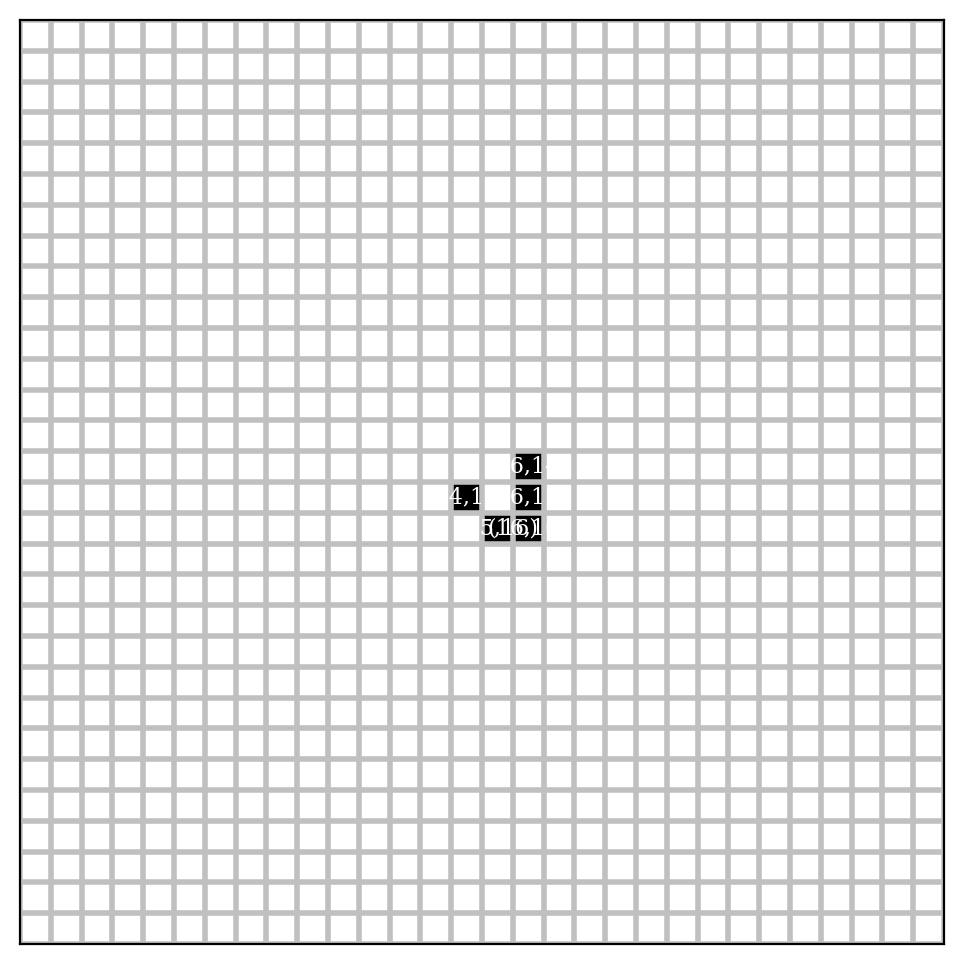

In [175]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_automata_grid(history[0], ax)
for i in range(len(history)-1):
    plt.pause(0.01)
    update_automata_grid(history[i], ax)

In [172]:
from matplotlib.patches import Rectangle
from matplotlib.text import Text

def plot_automata_grid(grid: Grid, ax: plt.Axes, cell_size: int = 30):
    """Plot a cellular automata grid with labeled cells
    
    Args:
        grid: Grid instance to plot
        ax: Matplotlib axes for plotting
        cell_size: Reference size for line widths (used for proportions)
    """
    height, width = grid.grid.shape
    
    # Set up white background
    ax.set_facecolor('white')
    
    # Dictionary to store patches and labels
    patches = {}
    
    # Create patches for live cells with labels
    for y in range(height):
        for x in range(width):
            if grid.grid[y, x]:
                # Create and add patch
                rect = Rectangle((x - 0.5, y - 0.5), 
                               width=1, height=1, 
                               facecolor='black',
                               edgecolor='none')
                ax.add_patch(rect)
                
                # Add coordinate label
                text = ax.text(x, y, f'({x},{y})',
                             ha='center', va='center',
                             color='white',
                             fontsize=8)
                
                # Store both patch and label
                patches[(x, y)] = (rect, text)
    
    # Add grid lines
    for x in range(width + 1):
        ax.axvline(x - 0.5, color='#c0c0c0', linewidth=3/cell_size*20)
    for y in range(height + 1):
        ax.axhline(y - 0.5, color='#c0c0c0', linewidth=3/cell_size*20)
    
    # Clean up appearance
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    
    # Extend grid lines to edge of plot
    ax.set_xlim(-0.5, width - 0.5)
    ax.set_ylim(height - 0.5, -0.5)  # Flip y-axis to match SVG orientation
    
    # Store patches dictionary as attribute of axes for updates
    ax.automata_patches = patches

def update_automata_grid(grid: Grid, ax: plt.Axes, prev_grid: Optional[Grid] = None):
    """Update only the changed cells in the grid
    
    Args:
        grid: Current Grid instance
        ax: Matplotlib axes containing the plot
        prev_grid: Previous Grid instance for comparison
    """
    height, width = grid.grid.shape
    patches = getattr(ax, 'automata_patches', {})
    
    # If no previous grid, treat all live cells as new
    if prev_grid is None:
        prev_grid = Grid(width, height)
    
    # Find changed cells
    for y in range(height):
        for x in range(width):
            curr_state = grid.grid[y, x]
            prev_state = prev_grid.grid[y, x]
            
            if curr_state != prev_state:
                if curr_state:  # Cell turned on
                    if (x, y) not in patches:
                        # Create new patch and label
                        rect = Rectangle((x - 0.5, y - 0.5), 
                                      width=1, height=1, 
                                      facecolor='black',
                                      edgecolor='none')
                        ax.add_patch(rect)
                        text = ax.text(x, y, f'({x},{y})',
                                     ha='center', va='center',
                                     color='white',
                                     fontsize=8)
                        patches[(x, y)] = (rect, text)
                else:  # Cell turned off
                    if (x, y) in patches:
                        # Remove patch and label
                        rect, text = patches[(x, y)]
                        rect.remove()
                        text.remove()
                        del patches[(x, y)]
    
    # Update figure
    ax.figure.canvas.draw_idle()
    
    # Store updated patches
    ax.automata_patches = patches

In [117]:
def plot_automata_grid(grid: Grid, ax: plt.Axes, cell_size: int = 30):
    """Plot a cellular automata grid with consistent styling matching SVG output
    
    Args:
        grid: Grid instance to plot
        ax: Matplotlib axes for plotting
        cell_size: Reference size for line widths (used for proportions)
    """
    height, width = grid.grid.shape
    
    # Plot cells
    ax.imshow(grid.grid, cmap='binary', interpolation='none')
    
    # Add grid lines
    for x in range(width + 1):
        ax.axvline(x - 0.5, color='#c0c0c0', linewidth=3/cell_size*20)
    for y in range(height + 1):
        ax.axhline(y - 0.5, color='#c0c0c0', linewidth=3/cell_size*20)
    
    # Clean up appearance
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    # Add white background
    ax.set_facecolor('white')
    # Extend grid lines to edge of plot
    ax.set_xlim(-0.5, width - 0.5)
    ax.set_ylim(height - 0.5, -0.5)  # Flip y-axis to match SVG orientation

These diagram generation functions maintain consistent styling while
providing specialized visualizations for:

1.  Wolfram rule definitions and their outcomes
2.  Game of Life rules and their effects

They work with the base Grid class but provide custom layouts specific
to teaching and explaining the rules of each system.

## Wolfram Automata

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/wolfram-automata.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/wolfram-automata.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Cellular automata are systems with simple rules that lead to complex
behaviours. A simple cellular automata can be defined over one dimension
of cells binary cells, and a discrete time evolution. At each time step
a cell’s state is dependent on its state in a previous time step and
that of its neighbours.

Stephen Wolfram noticed that such systems could be represented by a
binary number that described the nature of these rules. Each cell ($x$)
has a state at time $t$, and the state of two neighbours ($x+1$ and
$x-1$ at time $t$. The cellular automata dictates what the value of that
cell will be at time $t+1$. The possible values of the cell are $1$ or
$0$.

This simple system has eight different input states (three bits
associated with the cell and its two neighbours). And two possible
output states (one bit associated with the cell’s output state). so the
rules of the cellular automata can be expressed by exhaustively running
through the eight different input states giving the output state. To do
this requires a string of eight bits (or a byte) long: one output per
different input. That means there are 256 different possible cellular
automata.

Wolfram numbered the different cellular automata according to the output
states in an 8 bit binary number, each bit indexed by the three bits of
the input states (most significant bit first). So Rule 0 would give zero
output regardless of the input state. Rule 1 will give an output of 1
for the input state of three zeros etc and Rule 255 will give an output
of 1 regardless of the input state.

In [118]:
import numpy as np
from typing import Dict, Tuple, List

In [119]:
markdown = generate_wolfram_rule_markdown_table(1)
print(markdown)

| Pattern | Result | Binary Position | Rule Bit |
|---------|---------|----------------|----------|
| ■■■ | □ | 7 | 0 |
| ■■□ | □ | 6 | 0 |
| ■□■ | □ | 5 | 0 |
| ■□□ | □ | 4 | 0 |
| □■■ | □ | 3 | 0 |
| □■□ | □ | 2 | 0 |
| □□■ | □ | 1 | 0 |
| □□□ | ■ | 0 | 1 |



## Wolfram Automata Coding

| Pattern | Result | Binary Position | Rule Bit |
|:--------|:-------|:----------------|:---------|
| ■■■     | □      | 7               | 0        |
| ■■□     | □      | 6               | 0        |
| ■□■     | □      | 5               | 0        |
| ■□□     | □      | 4               | 0        |
| □■■     | □      | 3               | 0        |
| □■□     | □      | 2               | 0        |
| □□■     | □      | 1               | 0        |
| □□□     | ■      | 0               | 1        |

The rule number 1 in binary is: 00000001

Each bit in the binary number determines the result for one of the eight
possible patterns of three cells:

-   A foreground square (■) represents a cell in state 1
-   A background square (□) represents a cell in state 0
-   The patterns are ordered from 111 (7) to 000 (0)
-   The binary number determines the next state of the center cell for
    each pattern

For example:

-   If you see pattern ‘111’ (■■■), the next state will be {‘■’ if
    rule_binary\[0\] == ‘1’ else ‘□’}
-   If you see pattern ‘110’ (■■□), the next state will be {‘■’ if
    rule_binary\[1\] == ‘1’ else ‘□’}

And so on…

At each time step:

1.  Look at each cell and its two neighbors
2.  Find this pattern in the table above
3.  The center cell becomes the value shown in the ‘Result’ column

In [120]:
def get_rule_mapping(rule_number: int) -> Dict[Tuple[int, int, int], int]:
    """Convert a rule number (0-255) into a dictionary of state transitions
    
    Args:
        rule_number: Integer from 0-255 specifying the rule
        
    Returns:
        Dictionary mapping neighborhood tuples to next state
        
    Raises:
        ValueError: If rule_number is not between 0 and 255
    """
    if not 0 <= rule_number <= 255:
        raise ValueError("Rule number must be between 0 and 255")
    
    # Convert rule number to 8-bit binary
    rule_binary = format(rule_number, '08b')
    
    # Create mapping for all possible neighborhood combinations
    neighborhoods = [
        (1,1,1), (1,1,0), (1,0,1), (1,0,0),
        (0,1,1), (0,1,0), (0,0,1), (0,0,0)
    ]
    
    return {neighborhood: int(rule_binary[i]) 
            for i, neighborhood in enumerate(neighborhoods)}

In [121]:
def evolve_wolfram(grid: Grid, rule_number: int) -> Grid:
    """Evolve one step of a Wolfram cellular automaton
    
    Args:
        grid: 1D Grid instance representing current state
        rule_number: Which Wolfram rule to apply (0-255)
        
    Returns:
        New Grid instance representing next state
    """
    rule = get_rule_mapping(rule_number)
    new_grid = Grid(grid.width)
    
    for i in range(grid.width):
        left = grid[(i-1) % grid.width]
        center = grid[i]
        right = grid[(i+1) % grid.width]
        new_grid[i] = rule[(left, center, right)]
        
    return new_grid

In [122]:
def run_wolfram_automaton(rule_number: int, 
                            width: int, 
                            steps: int, 
                            initial_state: np.ndarray = None) -> List[Grid]:
    """Run a Wolfram automaton for multiple steps
    
    Args:
        rule_number: Which rule to apply (0-255)
        width: Width of the automaton
        steps: Number of steps to evolve
        initial_state: Optional initial state. If None, single center cell is set to 1
        
    Returns:
        List of Grid instances representing evolution history
    """
    # Initialize first grid
    history = [Grid(width)]
    if initial_state is not None:
        history[0].grid[0,:] = initial_state
    else:
        history[0][width // 2] = 1
    
    # Evolve system
    for _ in range(steps - 1):
        history.append(evolve_wolfram(history[-1], rule_number))
        
    return history

In [123]:
# Demonstrate Rule 1
rule_1_history = run_wolfram_automaton(1, width=8, steps=4)
svg = generate_wolfram_rule_diagram(1)
filename = mlai.filename_join("rule-001_explanation.svg", "./simulation/")
with open(filename, 'w') as f:
    f.write(svg)

## Rule 1

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/rule-001_explanation.svg" class="" width="95%" style="vertical-align:middle;">

Figure: <i>Rule 1 expressed in pixel form.</i>

## Rule 30

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/rule-30.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/rule-30.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Wolfram explored exhaustively the different automata, and [discovered
that Rule
30](But%20the%20surprising%20%5Bdiscovery%20I%20made%20in%20the%201980s%5D(https://content.wolfram.com/sw-publications/2020/07/origins-randomness-physical-systems.pdf))
exhibited particularly interesting behaviour.

Rule 30 generates patterns that appear random, yet are completely
deterministic.

In [124]:
markdown = generate_wolfram_rule_markdown_table(30)
print(markdown)

| Pattern | Result | Binary Position | Rule Bit |
|---------|---------|----------------|----------|
| ■■■ | □ | 7 | 0 |
| ■■□ | □ | 6 | 0 |
| ■□■ | □ | 5 | 0 |
| ■□□ | ■ | 4 | 1 |
| □■■ | ■ | 3 | 1 |
| □■□ | ■ | 2 | 1 |
| □□■ | ■ | 1 | 1 |
| □□□ | □ | 0 | 0 |



| Pattern | Result | Binary Position | Rule Bit |
|:--------|:-------|:----------------|:---------|
| ■■■     | □      | 7               | 0        |
| ■■□     | □      | 6               | 0        |
| ■□■     | □      | 5               | 0        |
| ■□□     | ■      | 4               | 1        |
| □■■     | ■      | 3               | 1        |
| □■□     | ■      | 2               | 1        |
| □□■     | ■      | 1               | 1        |
| □□□     | □      | 0               | 0        |

The rule number 30 in binary is: 00011110

In [125]:
# Generate Rule 30 explanation diagram
svg = generate_wolfram_rule_diagram(30)
filename = mlai.filename_join("rule-030_explanation.svg", "./simulation/")
with open(filename, 'w') as f:
    f.write(svg)

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/rule-030_explanation.svg" class="" width="95%" style="vertical-align:middle;">

Figure: <i>Rule 30 expressed in pixel form. Note how mixed the output
states are compared to simpler rules.</i>

In [126]:
import numpy as np
import matplotlib.pyplot as plt

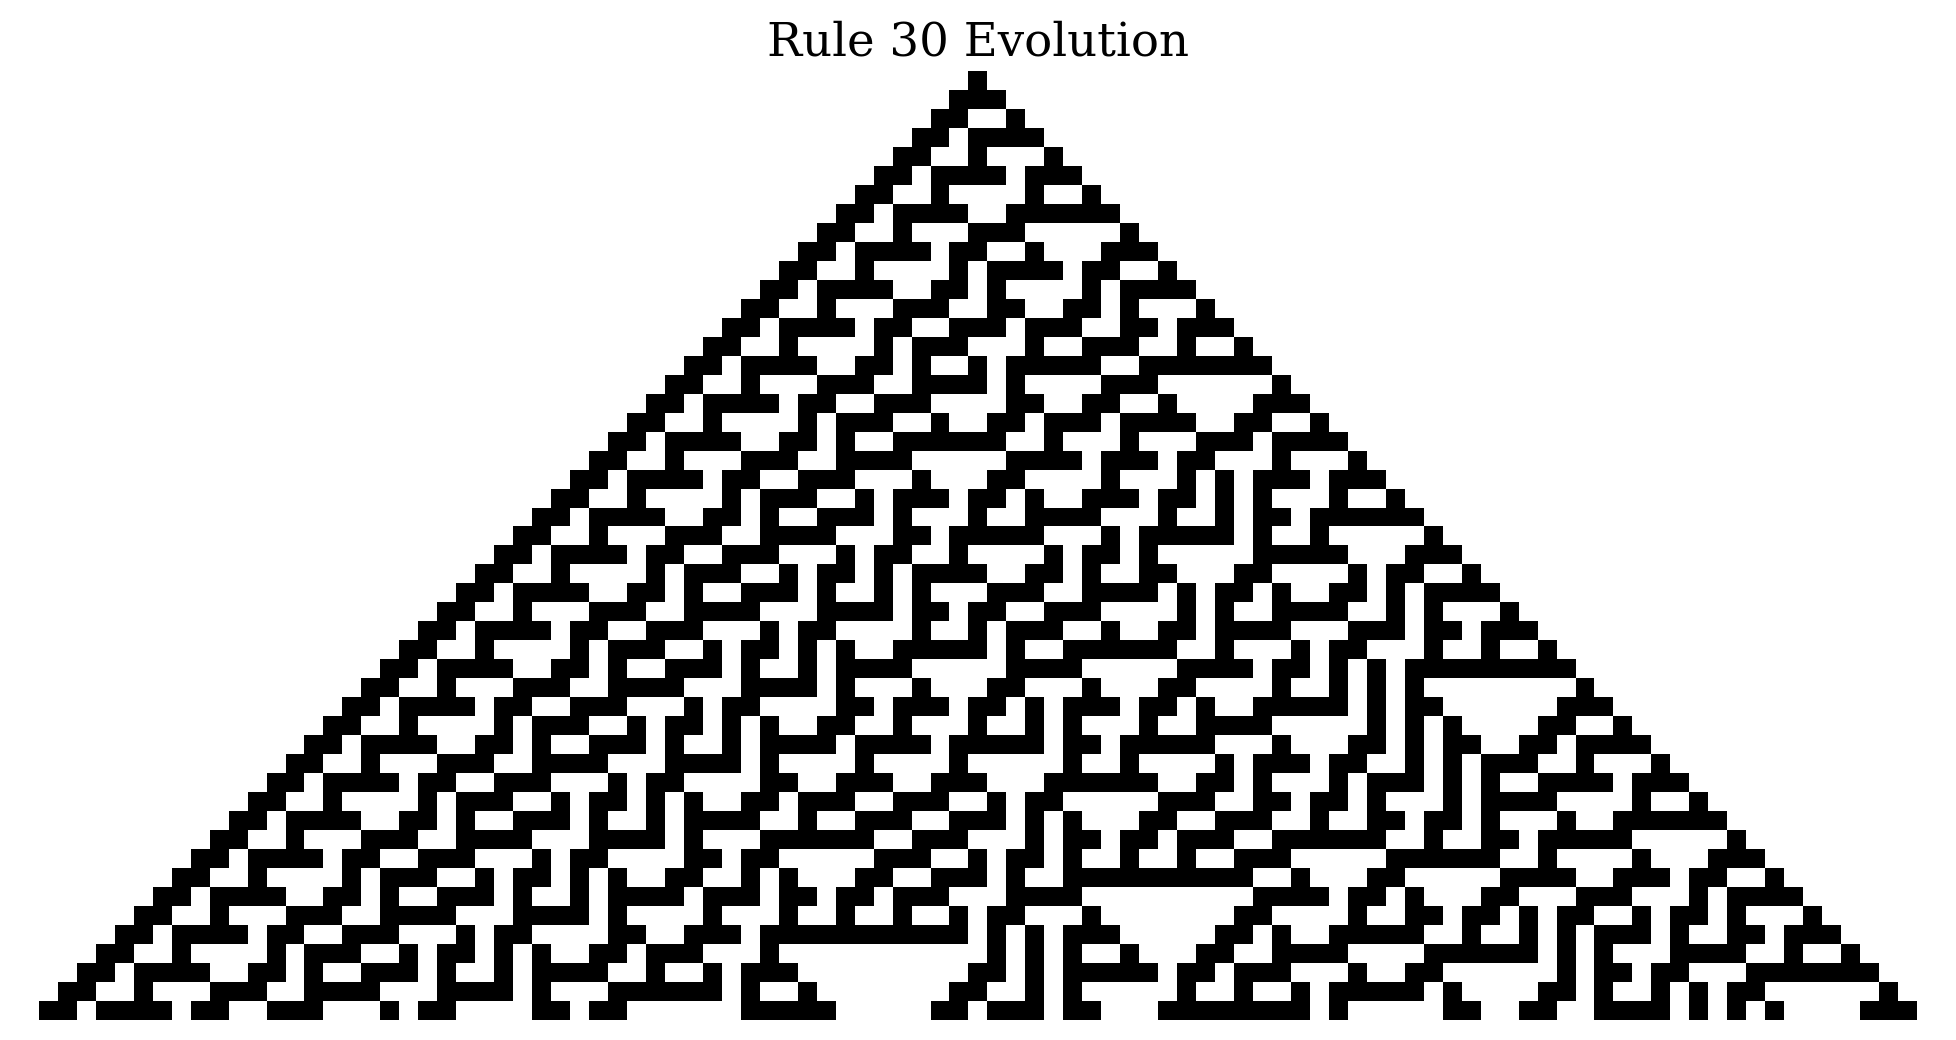

In [127]:
# Create and visualize Rule 30 evolution
rule_30_history = run_wolfram_automaton(
    rule_number=30,
    width=101,
    steps=50
)

# Stack histories for visualization
evolution = np.vstack([grid.grid for grid in rule_30_history])

# Create visualization
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.imshow(evolution, cmap='binary')
ax.axis('off')
ax.set_title("Rule 30 Evolution")
fig.tight_layout()

mlai.write_figure(filename='rule-030-progression.svg', 
                 directory='./simulation')

## Rule 30 in Cambridge

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/rule-030-cambridge-north.jpg" style="width:70%">

Figure: <i>Rule 30 has been used to decorate Cambridge North station
with aluminium cladding.</i>

> But the surprising [discovery I made in the
> 1980s](https://content.wolfram.com/sw-publications/2020/07/origins-randomness-physical-systems.pdf)
> by looking at things like rule 30 is that actually no such “external
> source” is needed: instead, it’s perfectly possible for [randomness to
> be generated
> intrinsically](https://www.wolframscience.com/nks/chap-7--mechanisms-in-programs-and-nature#sect-7-5--the-intrinsic-generation-of-randomness)
> within a system just through the process of applying definite
> underlying rules.

Wolfram refers to the pseudorandom pattern that emerges, in particular
down the center line of the automata as “computationally irreducible”.
At one point this line was even used within Wolfram as a pseudorandom
number generator.

## Game of Life

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/game-of-life.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/game-of-life.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

[John Horton Conway](https://en.wikipedia.org/wiki/John_Horton_Conway)
was a mathematician who developed a game known as the Game of Life. He
died in April 2020, but since he invented the game, he was in effect
‘god’ for this game. But as we will see, just inventing the rules
doesn’t give you omniscience in the game.

The Game of Life is played on a grid of squares, or pixels. Each pixel
is either on or off. The game has no players, but a set of simple rules
that are followed at each turn the rules are.

## Life Rules

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/life-rules.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/life-rules.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

John Conway’s game of life is a cellular automaton where the cells obey
three very simple rules. The cells live on a rectangular grid, so that
each cell has 8 possible neighbors.

In [128]:
# Generate diagrams for loneliness rule
for state in ['before', 'after']:
    svg = generate_life_rule_diagram(f'loneliness-{state}')
    filename = mlai.filename_join(f"life-rules-1-{0 if state == 'before' else 1}.svg", 
                                "./simulation/")
    with open(filename, 'w') as f:
        f.write(svg)

<table>
<tr>
<td width="70%">
<table>
<tr>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-1-0.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
<td width="39%">
<center>

*loneliness*

</center>
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//util/right-arrow.svg" class="" width="60%" style="vertical-align:middle;">

</center>
</td>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-1-1.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
</tr>
</table>
</td>
<td width="30%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//maths/John-Conway.jpg" style="width:100%">

</center>
</td>
</tr>
</table>

Figure: <i>‘Death’ through loneliness in Conway’s game of life. If a
cell is surrounded by less than three cells, it ‘dies’ through
loneliness.</i>

The game proceeds in turns, and at each location in the grid is either
alive or dead. Each turn, a cell counts its neighbors. If there are two
or fewer neighbors, the cell ‘dies’ of ‘loneliness’.

In [129]:
# Generate diagrams for overcrowding rule
for state in ['before', 'after']:
    svg = generate_life_rule_diagram(f'overcrowding-{state}')
    filename = mlai.filename_join(f"life-rules-2-{0 if state == 'before' else 1}.svg", 
                                "./simulation/")
    with open(filename, 'w') as f:
        f.write(svg)

<table>
<tr>
<td width="70%">
<table>
<tr>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-2-0.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
<td width="39%">
<center>

*overcrowding*

</center>
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//util/right-arrow.svg" class="" width="60%" style="vertical-align:middle;">

</center>
</td>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-2-1.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
</tr>
</table>
</td>
<td width="30%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//maths/John-Conway.jpg" style="width:100%">

</center>
</td>
</tr>
</table>

Figure: <i>‘Death’ through overpopulation in Conway’s game of life. If a
cell is surrounded by more than three cells, it ‘dies’ through
loneliness.</i>

If there are four or more neighbors, the cell ‘dies’ from
‘overcrowding’. If there are three neighbors, the cell persists, or if
it is currently dead, a new cell is born.

In [130]:
# Generate diagrams for birth rule
for state in ['before', 'after']:
    svg = generate_life_rule_diagram(f'birth-{state}')
    filename = mlai.filename_join(f"life-rules-3-{0 if state == 'before' else 1}.svg", 
                                "./simulation/")
    with open(filename, 'w') as f:
        f.write(svg)

<table>
<tr>
<td width="70%">
<table>
<tr>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-3-0.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
<td width="39%">
<center>

*birth*

</center>
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//util/right-arrow.svg" class="" width="60%" style="vertical-align:middle;">

</center>
</td>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-3-1.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
</tr>
</table>
</td>
<td width="30%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//maths/John-Conway.jpg" style="width:100%">

</center>
</td>
</tr>
</table>

Figure: <i>Birth in Conway’s life. Any position surrounded by precisely
three live cells will give birth to a new cell at the next turn.</i>

And that’s it. Those are the simple ‘physical laws’ for Conway’s game.

## Game of Life Implementation

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/life-implementation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/life-implementation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Now that we understand the rules of Life, let’s implement them. Each
cell’s fate is determined by counting its eight neighbors and applying
Conway’s rules.

In [131]:
from typing import Optional, Set

In [132]:
def count_life_neighbors(grid: Grid, x: int, y: int, boundary: str = 'periodic') -> int:
    """Count live neighbors for a cell in Game of Life
    
    Args:
        grid: Grid instance representing current state
        x, y: Cell coordinates
        boundary: Type of boundary conditions ('periodic' or 'fixed')
        
    Returns:
        Number of live neighbors (0-8)
    """
    count = 0
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
                
            if boundary == 'periodic':
                nx = (x + dx) % grid.width
                ny = (y + dy) % grid.height
                count += grid[nx, ny]
            else:  # fixed
                nx = x + dx
                ny = y + dy
                if 0 <= nx < grid.width and 0 <= ny < grid.height:
                    count += grid[nx, ny]
    return count

In [133]:
def evolve_life(grid: Grid, boundary: str = 'periodic') -> Grid:
    """Evolve one step of Conway's Game of Life
    
    Args:
        grid: Grid instance representing current state
        boundary: Type of boundary conditions ('periodic' or 'fixed')
        
    Returns:
        New Grid instance representing next state
    """
    new_grid = Grid(grid.width, grid.height)
    
    for y in range(grid.height):
        for x in range(grid.width):
            neighbors = count_life_neighbors(grid, x, y, boundary)
            # Apply Conway's rules
            if grid[x, y]:  # Live cell
                new_grid[x, y] = 1 if neighbors in [2, 3] else 0
            else:  # Dead cell
                new_grid[x, y] = 1 if neighbors == 3 else 0
                
    return new_grid

In [134]:
def run_life(width: int, 
                height: int, 
                steps: int, 
                initial_state: Optional[np.ndarray] = None,
                boundary: str = 'periodic') -> List[Grid]:
    """Run Game of Life for multiple steps
    
    Args:
        width: Grid width
        height: Grid height
        steps: Number of steps to evolve
        initial_state: Optional initial configuration
        boundary: Type of boundary conditions
        
    Returns:
        List of Grid instances representing evolution history
    """
    # Initialize first grid
    history = [Grid(width, height)]
    if initial_state is not None:
        history[0].grid = initial_state.copy()
    else:
        # Default to random initial state
        history[0].grid = np.random.randint(2, size=(height, width))
    
    # Evolve system
    for _ in range(steps - 1):
        history.append(evolve_life(history[-1], boundary))
        
    return history

The implementation above provides: 1. Neighbor counting with different
boundary conditions 2. Rule application following Conway’s
specifications 3. Support for both periodic and fixed boundaries 4.
History tracking for visualization 5. Flexible initial state
configuration

This base implementation will be essential when we combine it with
Wolfram automata, as we’ll need to modify the boundary conditions to
interact with the Wolfram rules.

In [135]:
import matplotlib.pyplot as plt

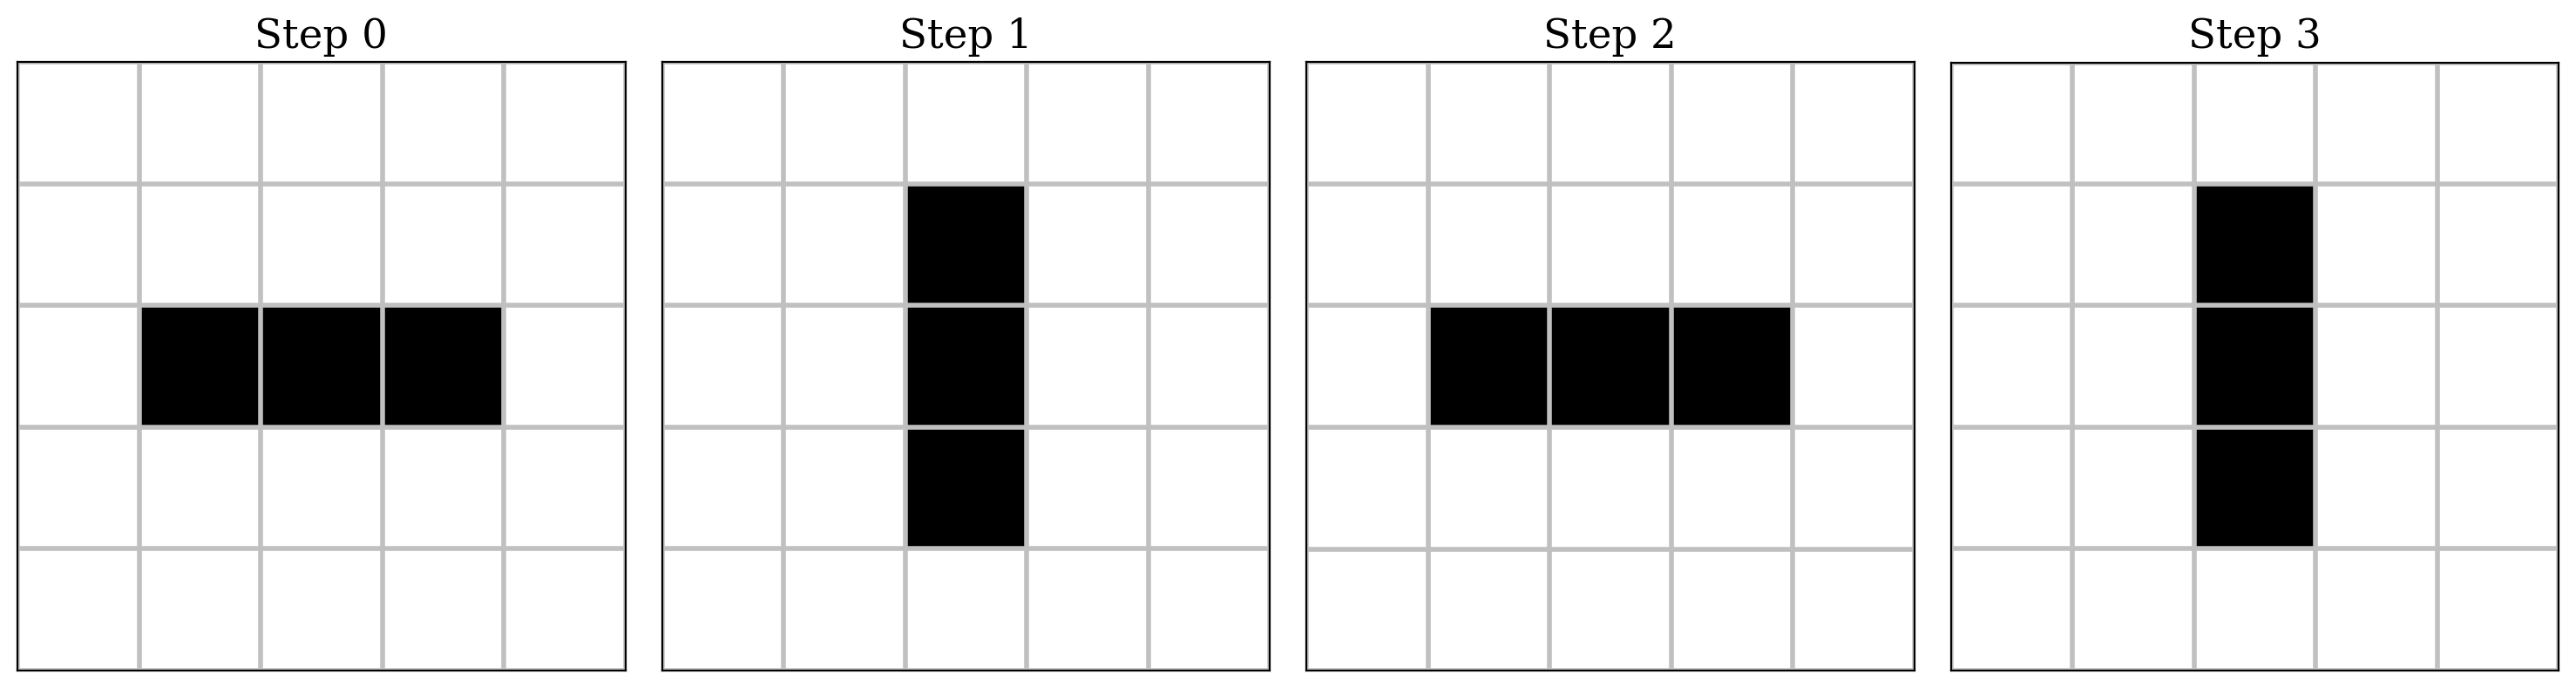

In [136]:
# Demonstrate simple Life evolution with enhanced visualization
# Create a simple oscillator (blinker)
initial_state = np.zeros((5, 5))
initial_state[2, 1:4] = 1  # Three cells in a row

history = run_life(5, 5, steps=4, initial_state=initial_state)

# Visualize evolution
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
fig.set_facecolor('white')  # White background for entire figure

for i, grid in enumerate(history):
    plot_automata_grid(grid, axes[i])
    axes[i].set_title(f'Step {i}')

plt.tight_layout()

mlai.write_figure(filename='life-blinker.svg', 
                 directory='./simulation')

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-blinker.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Evolution of a simple oscillator (blinker) in the Game of
Life.</i>

This implementation will serve as the foundation for our exploration of
Life patterns and ultimately for our hybrid system combining Life with
Wolfram automata. The key is the flexibility in boundary conditions,
which will allow us to interface with Wolfram rules at the edges.

## Spaceships, oscillators and static patterns

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/life-glider-loafer-conway.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/life-glider-loafer-conway.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The game leads to patterns emerging, some of these patterns are static,
but some oscillate in place, with varying periods. Others oscillate, but
when they complete their cycle they’ve translated to a new location, in
other words they move. In Life the former are known as
[oscillators](https://conwaylife.com/wiki/Oscillator) and the latter as
[spaceships](https://conwaylife.com/wiki/Spaceship).

In [137]:
class LifePattern:
    """Class to represent and validate classic Life patterns"""
    def __init__(self, 
                 name: str,
                 pattern: List[Tuple[int, int]],
                 period: int,
                 translation: Tuple[int, int] = None,
                 discovery_year: int = None,
                 discoverer: str = None):
        """
        Args:
            name: Name of the pattern
            pattern: List of (x,y) coordinates for live cells
            period: Number of steps before pattern repeats
            translation: (dx,dy) movement after one period
            discovery_year: Year pattern was discovered
            discoverer: Name of discoverer
        """
        self.name = name
        self.pattern = pattern
        self.period = period
        self.translation = translation or (0, 0)
        self.discovery_year = discovery_year
        self.discoverer = discoverer
    
    def to_grid(self, size: int = 20) -> Grid:
        """Convert pattern to Grid instance"""
        grid = Grid(size, size)
        min_x = min(x for x, _ in self.pattern)
        min_y = min(y for _, y in self.pattern)
        
        # Center the pattern
        offset_x = size//2 - (max(x for x, _ in self.pattern) + min_x)//2
        offset_y = size//2 - (max(y for _, y in self.pattern) + min_y)//2
        
        for x, y in self.pattern:
            grid[x + offset_x, y + offset_y] = 1
        return grid

## Pattern Analysis

Before looking at specific examples, let’s understand how these patterns
behave. Life patterns can be classified by their periodic behavior and
movement: - *Static patterns* remain unchanged from one generation to
the next - *Oscillators* return to their initial state after a fixed
number of generations (their period) - *Spaceships* combine oscillation
with translation, moving across the grid while cycling through their
states

Each pattern can be characterized by: - Its period (how many steps
before it repeats) - Its translation (how far it moves each period) -
Its velocity (translation per period)

In [138]:
# Define classic patterns
GLIDER = LifePattern(
    name="Glider",
    pattern=[(0,1), (1,2), (2,0), (2,1), (2,2)],
    period=4,
    translation=(1,1),
    discovery_year=1969,
    discoverer="Richard K. Guy"
)

LOAFER = LifePattern(
    name="Loafer",
    pattern=[(0,2), (1,0), (1,2), (2,1), (2,2), (3,2), (4,2)],
    period=7,
    translation=(1,0),
    discovery_year=2013,
    discoverer="Josh Ball"
)

GOSPER_GLIDER_GUN = LifePattern(
    name="Gosper Glider Gun",
    pattern=[(0,2), (0,3), (1,2), (1,3), (8,3), (8,4), (9,2), (9,4), 
             (10,2), (10,3), (16,4), (16,5), (16,6), (17,4), (18,5),
             (22,1), (22,2), (23,0), (23,2), (24,0), (24,1), (24,2),
             (25,0), (25,1), (34,3), (34,4), (35,3), (35,4)],
    period=30,
    discovery_year=1970,
    discoverer="Bill Gosper"
)

In [139]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [140]:
def create_pattern_animation(pattern: LifePattern, 
                              steps: int = 20, 
                              size: int = 30,
                              interval: int = 200):
    """Create animation of a Life pattern evolution
    
    Args:
        pattern: LifePattern to animate
        steps: Number of steps to evolve
        size: Grid size
        interval: Animation interval in milliseconds
    """
    # Initialize with pattern
    history = run_life(
        size, size,
        steps=steps,
        initial_state=pattern.to_grid(size).grid
    )
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
    fig.set_facecolor('white')
    
    # Plot initial state
    plot_automata_grid(history[0], ax)
    
    def animate(frame):
        ax.clear()
        plot_automata_grid(history[frame], ax)
        ax.set_title(f"{pattern.name} - Step {frame}")
        return ax,
    
    anim = FuncAnimation(
        fig, animate, frames=len(history),
        interval=interval, blit=True
    )
    
    # Save animation
    filename = pattern.name.lower().replace(" ", "-")
    anim.save(mlai.filename_join(f'{filename}.gif',
                                './simulation'),
              writer='pillow')

  
John Horton Conway, as the creator of the game of life, could be seen
somehow as the god of this small universe. He created the rules. The
rules are so simple that in many senses he, and we, are all-knowing in
this space. But despite our knowledge, this world can still ‘surprise’
us. From the simple rules, emergent patterns of behaviour arise.

In [146]:
from IPython.display import SVG

In [141]:
history = run_life(
        30, 30,
        steps=20,
        initial_state=GLIDER.to_grid(30).grid
    )

In [148]:
SVG?

Init signature: SVG(data=None, url=None, filename=None, metadata=None)
Docstring:     
Embed an SVG into the display.

Note if you just want to view a svg image via a URL use `:class:Image` with
a url=URL keyword argument.
Init docstring:
Create a display object given raw data.

When this object is returned by an expression or passed to the
display function, it will result in the data being displayed
in the frontend. The MIME type of the data should match the
subclasses used, so the Png subclass should be used for 'image/png'
data. If the data is a URL, the data will first be downloaded
and then displayed.

Parameters
----------
data : unicode, str or bytes
    The raw data or a URL or file to load the data from
url : unicode
    A URL to download the data from.
filename : unicode
    Path to a local file to load the data from.
metadata : dict
    Dict of metadata associated to be the object when displayed
File:           /opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/c

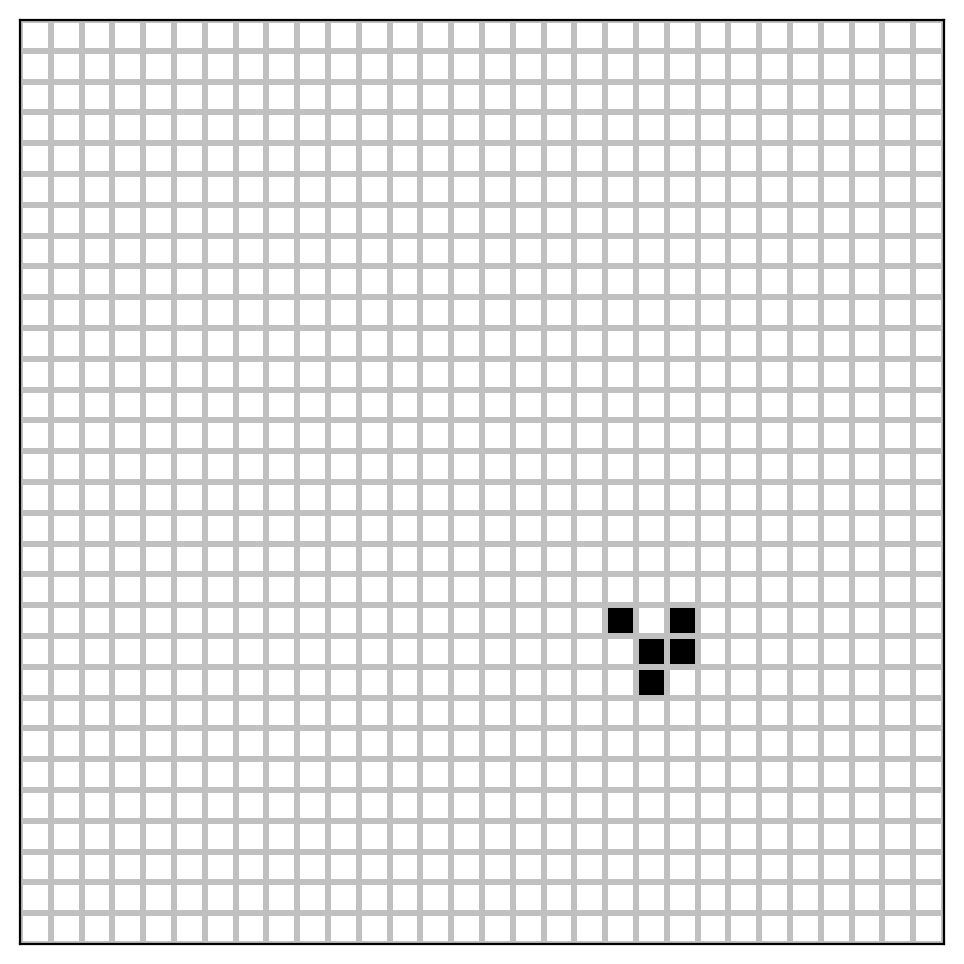

In [167]:
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(len(history)):
    plot_automata_grid(history[i], ax)

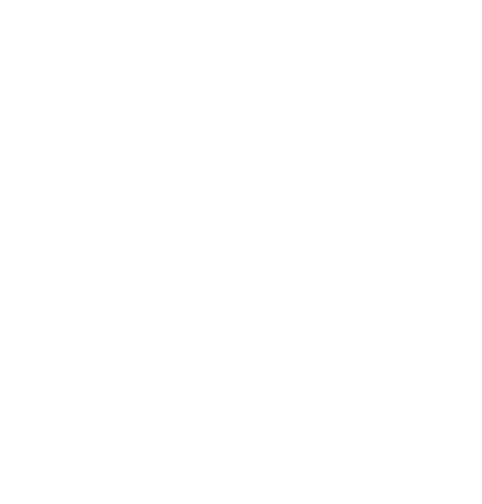

In [39]:
# Generate Glider animation
create_pattern_animation(GLIDER, steps=20)

<table>
<tr>
<td width="45%">
<center>

*Glider (1969)*

</center>
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/glider.gif" style="width:80%">

</center>
</td>
<td width="45%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//maths/John-Conway.jpg" style="width:80%">

</td>
</tr>
</table>

Figure: <i>*Left* A Glider pattern discovered 1969 by Richard K. Guy.
*Right*. John Horton Conway, creator of *Life* (1937-2020). The glider
is an oscillator that moves diagonally after creation.</i>

The glider was ‘discovered’ in 1969 by Richard K. Guy. What do we mean
by discovered in this context? Well, as soon as the game of life is
defined, objects such as the glider do somehow exist, but the many
configurations of the game mean that it takes some time for us to see
one and know it exists. This means, that despite being the creator,
Conway, and despite the rules of the game being simple, and despite the
rules being deterministic, we are not ‘omniscient’ in any simplistic
sense. It requires computation to ‘discover’ what can exist in this
universe once it’s been defined.

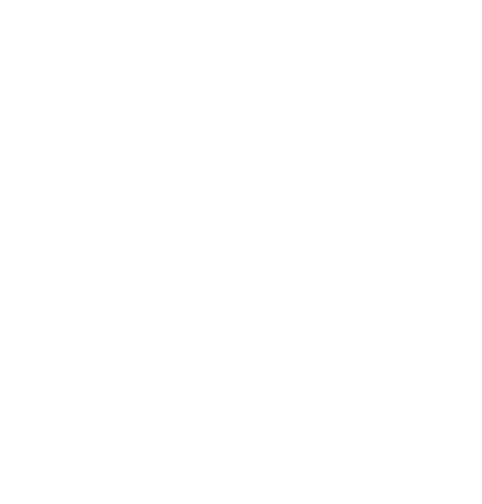

In [40]:
# Generate Gosper Glider Gun animation
create_pattern_animation(GOSPER_GLIDER_GUN, steps=50, size=50)

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/gosper-glider-gun.gif" style="width:80%">

Figure: <i>The Gosper glider gun is a configuration that creates
gliders. A new glider is released after every 30 turns.</i>

These patterns had to be discovered, in the same way that a scientist
might discover a disease, or an explorer a new land. For example, the
Gosper glider gun was [discovered by Bill Gosper in
1970](https://conwaylife.com/wiki/Bill_Gosper). It is a pattern that
creates a new glider every 30 turns of the game.

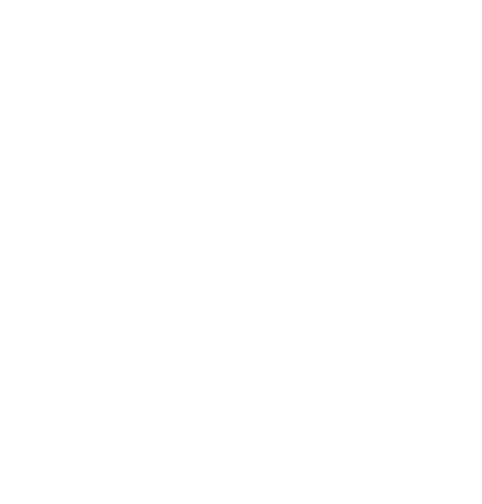

In [41]:
# Generate Loafer animation
create_pattern_animation(LOAFER, steps=28)

<table>
<tr>
<td width="45%">
<center>

*Loafer (2013)*

</center>
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/loafer.gif" style="width:80%">

</center>
</td>
<td width="45%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//maths/John-Conway.jpg" style="width:80%">

</td>
</tr>
</table>

Figure: <i>*Left* A Loafer pattern discovered by Josh Ball in 2013.
*Right*. John Horton Conway, creator of *Life* (1937-2020).</i>

Despite widespread interest in Life, some of its patterns were only very
recently discovered like the Loafer, discovered in 2013 by Josh Ball.
So, despite the game having existed for over forty years, and the rules
of the game being simple, there are emergent behaviors that are unknown.

Once these patterns are discovered, they are combined (or engineered) to
create new Life patterns that do some remarkable things. For example,
there’s a life pattern that runs a Turing machine, or more remarkably
there’s a Life pattern that runs Life itself.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-in-life.gif" style="width:80%">

Figure: <i>The Game of Life running in Life. The video is drawing out
recursively showing pixels that are being formed by filling cells with
moving spaceships. Each individual pixel in this game of life is made up
of $2048 \times 2048$ pixels called an [OTCA
metapixel](https://www.conwaylife.com/wiki/OTCA_metapixel).</i>

To find out more about the Game of Life you can watch this video by Alan
Zucconi or read his [associated blog
post](https://www.alanzucconi.com/2020/10/13/conways-game-of-life/).

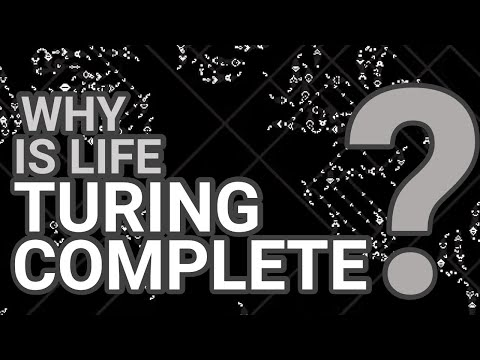

In [42]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Kk2MH9O4pXY')

Figure: <i>An introduction to the Game of Life by Alan Zucconi.</i>

Contrast this with our situation where in ‘real life’ we don’t know the
simple rules of the game, the state space is larger, and emergent
behaviors (hurricanes, earthquakes, volcanos, climate change) have
direct consequences for our daily lives, and we understand why the
process of ‘understanding’ the physical world is so difficult. We also
see immediately how much easier we might expect the physical sciences to
be than the social sciences, where the emergent behaviors are contingent
on highly complex human interactions.

include{\_simulation/includes/automata-base.md}

## Combining Wolfram and Conway

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/wolfram-conway-life.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/wolfram-conway-life.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We can create an interesting hybrid system by combining Wolfram’s
elementary cellular automata with Conway’s Game of Life. The system
consists of a square grid where the interior follows Conway’s rules, but
the border cells evolve according to a chosen Wolfram rule. The Wolfram
rule wraps around the border, creating a dynamic boundary condition for
the Life cells.

In [43]:
from typing import Tuple, Optional, Set
import numpy as np

In [44]:
class HybridAutomaton:
    """Combined Wolfram-Conway automaton system
    
    A square grid where:
    - Interior follows Conway's Game of Life rules
    - Border follows a specified Wolfram rule
    - Border wraps around (Wolfram rule connects at corners)
    """
    def __init__(self, size: int, wolfram_rule: int):
        """
        Args:
            size: Size of the square grid
            wolfram_rule: Which Wolfram rule to use for borders (0-255)
        """
        self.size = size
        self.wolfram_rule = wolfram_rule
        self.grid = Grid(size, size)
        self.rule_mapping = get_rule_mapping(wolfram_rule)
        
    def get_border_cells(self) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Get the four borders as 1D arrays (for Wolfram rules)
        Returns borders in order: top, right, bottom, left
        """
        return (
            self.grid.grid[0, :],          # Top border
            self.grid.grid[:, -1],         # Right border
            self.grid.grid[-1, ::-1],      # Bottom border (reversed)
            self.grid.grid[::-1, 0]        # Left border (reversed)
        )
        
    def set_border_cells(self, top: np.ndarray, right: np.ndarray, 
                        bottom: np.ndarray, left: np.ndarray):
        """Set the border cells from 1D arrays"""
        self.grid.grid[0, :] = top
        self.grid.grid[:, -1] = right
        self.grid.grid[-1, :] = bottom[::-1]  # Reverse to maintain correct order
        self.grid.grid[:, 0] = left[::-1]
        
    def evolve_borders(self):
        """Evolve the border cells using a single Wolfram rule

        The border is treated as a single 1D array that wraps around
        the entire perimeter of the grid, with the rule applying 
        continuously around corners.
        """
        # Get current borders and join them into a single perimeter
        # Going clockwise: top -> right -> bottom -> left
        top, right, bottom, left = self.get_border_cells()
        # Note: bottom and left are already reversed in get_border_cells
        perimeter = np.concatenate([top, right, bottom, left])

        # Evolve the entire perimeter as one continuous 1D array
        new_perimeter = np.zeros_like(perimeter)
        # Include wrap-around for the full perimeter
        extended = np.hstack([perimeter[-1:], perimeter, perimeter[:1]])
        for i in range(len(perimeter)):
            neighborhood = (extended[i], extended[i+1], extended[i+2])
            new_perimeter[i] = self.rule_mapping[neighborhood]

        # Split the evolved perimeter back into borders
        size = self.size
        new_top = new_perimeter[:size]
        new_right = new_perimeter[size:2*size]
        new_bottom = new_perimeter[2*size:3*size][::-1]  # Reverse for bottom
        new_left = new_perimeter[3*size:][::-1]          # Reverse for left

        # Update borders
        self.set_border_cells(new_top, new_right, new_bottom, new_left)

    def evolve_interior(self):
        """Evolve interior cells using Conway's rules"""
        new_grid = Grid(self.size, self.size)
        # Copy borders to new grid
        top, right, bottom, left = self.get_border_cells()
        new_grid.grid[0, :] = top
        new_grid.grid[:, -1] = right
        new_grid.grid[-1, :] = bottom[::-1]
        new_grid.grid[:, 0] = left[::-1]
        
        # Evolve interior cells
        for y in range(1, self.size-1):
            for x in range(1, self.size-1):
                neighbors = count_life_neighbors(self.grid, x, y, boundary='fixed')
                if self.grid[x, y]:
                    new_grid[x, y] = 1 if neighbors in [2, 3] else 0
                else:
                    new_grid[x, y] = 1 if neighbors == 3 else 0
                    
        self.grid = new_grid
        
    def step(self):
        """Perform one step of hybrid evolution"""
        self.evolve_borders()
        self.evolve_interior()
        
    def run(self, steps: int) -> List[Grid]:
        """Run simulation for specified number of steps
        
        Returns:
            List of Grid instances representing evolution history
        """
        history = [self.grid.copy()]
        for _ in range(steps):
            self.step()
            history.append(self.grid.copy())
        return history

In [45]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [46]:
def create_hybrid_animation(size: int = 30,
                             wolfram_rule: int = 30,
                             steps: int = 50,
                             interval: int = 200,
                             initial_pattern: Optional[LifePattern] = None):
    """Create animation of hybrid Wolfram-Conway system
    
    Args:
        size: Grid size
        wolfram_rule: Wolfram rule number for borders
        steps: Number of steps to simulate
        interval: Animation interval in milliseconds
        initial_pattern: Optional LifePattern to initialize interior
    """
    # Initialize system
    hybrid = HybridAutomaton(size, wolfram_rule)
    
    # Set initial pattern if provided
    if initial_pattern:
        pattern_grid = initial_pattern.to_grid(size-2)  # Smaller to fit interior
        hybrid.grid.grid[1:-1, 1:-1] = pattern_grid.grid
    
    # Run simulation
    history = hybrid.run(steps)
    
    # Create animation
    fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
    fig.set_facecolor('white')
    
    plot_automata_grid(history[0], ax)
    
    def animate(frame):
        ax.clear()
        plot_automata_grid(history[frame], ax)
        ax.set_title(f"Hybrid Evolution - Step {frame}")
        return ax,
    
    anim = FuncAnimation(
        fig, animate,
        frames=len(history),
        interval=interval,
        blit=True
    )
    
    # Save animation
    filename = f'hybrid-r{wolfram_rule}'
    if initial_pattern:
        filename += f'-{initial_pattern.name.lower()}'
    anim.save(mlai.filename_join(f'{filename}.gif',
                                './simulation'),
              writer='pillow')
    return history

Let’s demonstrate this hybrid system with some examples. First, let’s
see how Rule 30 interacts with a glider:

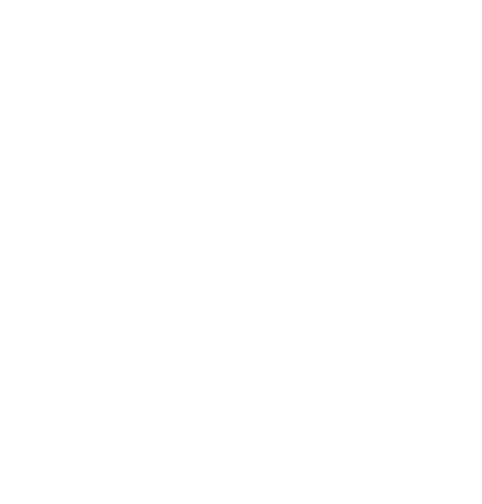

In [47]:
# Create hybrid system with Rule 30 and a glider
create_hybrid_animation(
    size=30,
    wolfram_rule=30,
    steps=50,
    initial_pattern=GLIDER
)

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/hybrid-r30-glider.gif" style="width:80%">

Figure: <i>A glider pattern evolving within borders governed by Rule 30.
Notice how the complex border patterns influence the glider’s
behavior.</i>

Now let’s try a different combination - Rule 110 (another complex rule)
with a loafer:

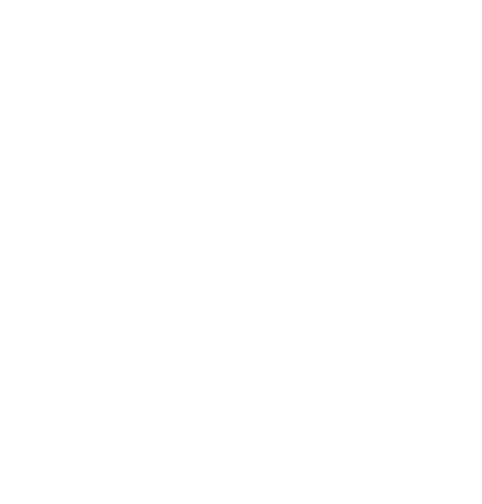

In [48]:
# Create hybrid system with Rule 110 and a loafer
create_hybrid_animation(
    size=30,
    wolfram_rule=110,
    steps=50,
    initial_pattern=LOAFER
)

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/hybrid-r110-loafer.gif" style="width:80%">

Figure: <i>A loafer pattern evolving within borders governed by Rule
110. The border patterns create a dynamic environment that affects the
loafer’s movement.</i>

This hybrid system demonstrates how two different types of cellular
automata can be combined to create new behaviours.

## Packing Problems

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/packing-problems.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/packing-problems.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/friedman/s9.gif" style="width:50%">

Figure: <i>Packing 9 squares into a single square. This example is
trivially solved. Credit <https://erich-friedman.github.io/packing/></i>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/friedman/s17.gif" style="width:50%">

Figure: <i>Packing 17 squares into a single square. The optimal solution
is sometimes hard to find. Here the side length of the smallest square
that holds 17 similarly shaped squares is at least 4.675 times the
smaller square. This solution found by John Bidwell in 1997. Credit
<https://erich-friedman.github.io/packing/></i>

Another example of a problem where the “physics” is understood because
it’s really mathematics, is packing problems. Here the mathematics is
just geometry, but still we need some form of compute to solve these
problems. [Erich Friedman’s
website](https://erich-friedman.github.io/packing/) contains a host of
these problems, only some of which are analytically tractable.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/friedman/s10.gif" style="width:50%">

Figure: <i>Packing 10 squares into a single square. This example is
proven by Walter Stromquist (Stromquist, 1984). Here
$s=3+\frac{1}{\sqrt{2}}$. Credit
<https://erich-friedman.github.io/packing/></i>

## Bayesian Inference by Rejection Sampling

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_gp/includes/gp-intro-very-short.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_gp/includes/gp-intro-very-short.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

One view of Bayesian inference is to assume we are given a mechanism for
generating samples, where we assume that mechanism is representing an
accurate view on the way we believe the world works.

This mechanism is known as our *prior* belief.

We combine our prior belief with our observations of the real world by
discarding all those prior samples that are inconsistent with our
observations. The *likelihood* defines mathematically what we mean by
inconsistent with the observations. The higher the noise level in the
likelihood, the looser the notion of consistent.

The samples that remain are samples from the *posterior*.

This approach to Bayesian inference is closely related to two sampling
techniques known as *rejection sampling* and *importance sampling*. It
is realized in practice in an approach known as *approximate Bayesian
computation* (ABC) or likelihood-free inference.

In practice, the algorithm is often too slow to be practical, because
most samples will be inconsistent with the observations and as a result
the mechanism must be operated many times to obtain a few posterior
samples.

However, in the Gaussian process case, when the likelihood also assumes
Gaussian noise, we can operate this mechanism mathematically, and obtain
the posterior density *analytically*. This is the benefit of Gaussian
processes.

First, we will load in two python functions for computing the covariance
function.

In [49]:
import mlai

In [50]:
# %load -n mlai.Kernel
class Kernel():
    """Covariance function
    :param function: covariance function
    :type function: function
    :param name: name of covariance function
    :type name: string
    :param shortname: abbreviated name of covariance function
    :type shortname: string
    :param formula: latex formula of covariance function
    :type formula: string
    :param function: covariance function
    :type function: function
    :param \**kwargs:
        See below

    :Keyword Arguments:
        * """

    def __init__(self, function, name=None, shortname=None, formula=None, **kwargs):        
        self.function=function
        self.formula = formula
        self.name = name
        self.shortname = shortname
        self.parameters=kwargs
        
    def K(self, X, X2=None):
        """Compute the full covariance function given a kernel function for two data points."""
        if X2 is None:
            X2 = X
        K = np.zeros((X.shape[0], X2.shape[0]))
        for i in np.arange(X.shape[0]):
            for j in np.arange(X2.shape[0]):
                K[i, j] = self.function(X[i, :], X2[j, :], **self.parameters)

        return K

    def diag(self, X):
        """Compute the diagonal of the covariance function"""
        diagK = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):            
            diagK[i] = self.function(X[i, :], X[i, :], **self.parameters)
        return diagK

    def _repr_html_(self):
        raise NotImplementedError

In [51]:
# %load -n mlai.Kernel
class Kernel():
    """Covariance function
    :param function: covariance function
    :type function: function
    :param name: name of covariance function
    :type name: string
    :param shortname: abbreviated name of covariance function
    :type shortname: string
    :param formula: latex formula of covariance function
    :type formula: string
    :param function: covariance function
    :type function: function
    :param \**kwargs:
        See below

    :Keyword Arguments:
        * """

    def __init__(self, function, name=None, shortname=None, formula=None, **kwargs):        
        self.function=function
        self.formula = formula
        self.name = name
        self.shortname = shortname
        self.parameters=kwargs
        
    def K(self, X, X2=None):
        """Compute the full covariance function given a kernel function for two data points."""
        if X2 is None:
            X2 = X
        K = np.zeros((X.shape[0], X2.shape[0]))
        for i in np.arange(X.shape[0]):
            for j in np.arange(X2.shape[0]):
                K[i, j] = self.function(X[i, :], X2[j, :], **self.parameters)

        return K

    def diag(self, X):
        """Compute the diagonal of the covariance function"""
        diagK = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):            
            diagK[i] = self.function(X[i, :], X[i, :], **self.parameters)
        return diagK

    def _repr_html_(self):
        raise NotImplementedError

In [52]:
import mlai

In [53]:
# %load -n mlai.eq_cov
def eq_cov(x, x_prime, variance=1., lengthscale=1.):
    """Exponentiated quadratic covariance function."""
    diffx = x - x_prime
    return variance*np.exp(-0.5*np.dot(diffx, diffx)/lengthscale**2)

In [54]:
# %load -n mlai.eq_cov
def eq_cov(x, x_prime, variance=1., lengthscale=1.):
    """Exponentiated quadratic covariance function."""
    diffx = x - x_prime
    return variance*np.exp(-0.5*np.dot(diffx, diffx)/lengthscale**2)

In [55]:
kernel = Kernel(function=eq_cov,
                     name='Exponentiated Quadratic',
                     shortname='eq',                     
                     lengthscale=0.25)

Next, we sample from a multivariate normal density (a multivariate
Gaussian), using the covariance function as the covariance matrix.

In [56]:
import numpy as np
np.random.seed(10)
import mlai.plot as plot

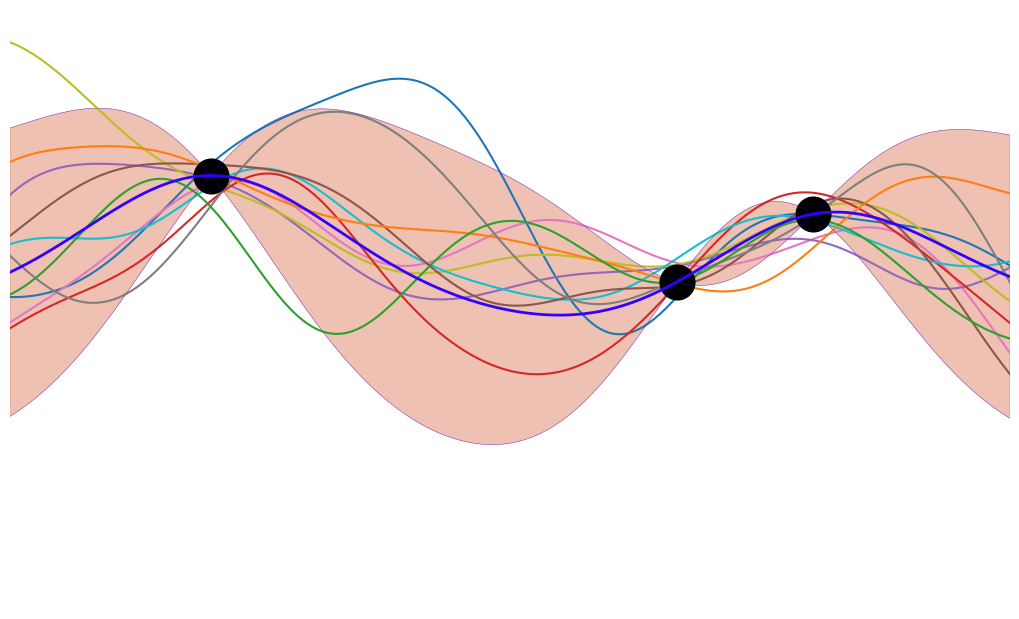

In [57]:
plot.rejection_samples(kernel=kernel, 
    diagrams='./gp')

In [58]:
import notutils as nu
from ipywidgets import IntSlider

In [59]:
nu.display_plots('gp_rejection_sample{sample:0>3}.png', 
                 directory='./gp', 
                 sample=IntSlider(1,1,5,1))

interactive(children=(IntSlider(value=1, description='sample', max=5, min=1), Output()), _dom_classes=('widget…

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//gp/gp_rejection_sample003.png" style="width:100%">
<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//gp/gp_rejection_sample004.png" style="width:100%">
<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//gp/gp_rejection_sample005.png" style="width:100%">

Figure: <i>One view of Bayesian inference is we have a machine for
generating samples (the *prior*), and we discard all samples
inconsistent with our data, leaving the samples of interest (the
*posterior*). This is a rejection sampling view of Bayesian inference.
The Gaussian process allows us to do this analytically by multiplying
the *prior* by the *likelihood*.</i>

So, Gaussian processes provide an example of a particular type of model.
Or, scientifically, we can think of such a model as a mathematical
representation of a hypothesis around data. The rejection sampling view
of Bayesian inference can be seen as rejecting portions of that initial
hypothesis that are inconsistent with the data. From a Popperian
perspective, areas of the prior space are falsified by the data, leaving
a posterior space that represents remaining plausible hypotheses.

The flaw with this point of view is that the initial hypothesis space
was also restricted. It only contained functions where the instantiated
points from the function are jointly Gaussian distributed.

## Universe isn’t as Gaussian as it Was

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_gp/includes/planck-cmp-master-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_gp/includes/planck-cmp-master-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The [Planck space
craft](https://en.wikipedia.org/wiki/Planck_(spacecraft)) was a European
Space Agency space telescope that mapped the cosmic microwave background
(CMB) from 2009 to 2013. The [Cosmic Microwave
Background](https://en.wikipedia.org/wiki/Cosmic_microwave_background)
is the first observable echo we have of the big bang. It dates to
approximately 400,000 years after the big bang, at the time the Universe
was approximately $10^8$ times smaller and the temperature of the
Universe was high, around $3 \times 10^8$ degrees Kelvin. The Universe
was in the form of a hydrogen plasma. The echo we observe is the moment
when the Universe was cool enough for protons and electrons to combine
to form hydrogen atoms. At this moment, the Universe became transparent
for the first time, and photons could travel through space.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/Front_view_of_the_European_Space_Agency_Planck_satellite.jpg" style="width:60%">

Figure: <i>Artist’s impression of the Planck spacecraft which measured
the Cosmic Microwave Background between 2009 and 2013.</i>

The objective of the Planck spacecraft was to measure the anisotropy and
statistics of the Cosmic Microwave Background. This was important,
because if the standard model of the Universe is correct the variations
around the very high temperature of the Universe of the CMB should be
distributed according to a Gaussian process.[1] Currently our best
estimates show this to be the case (Elsner et al., 2016, 2015; Jaffe et
al., 1998; Pontzen and Peiris, 2010).

To the high degree of precision that we could measure with the Planck
space telescope, the CMB appears to be a Gaussian process. The
parameters of its covariance function are given by the fundamental
parameters of the Universe, for example the amount of dark matter and
matter in the Universe.

<img class="vertical-align:middle" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//Planck_CMB.png" style="width:50%">

Figure: <i>The cosmic microwave background is, to a very high degree of
precision, a Gaussian process. The parameters of its covariance function
are given by fundamental parameters of the universe, such as the amount
of dark matter and mass.</i>

[1] Most of my understanding of this is taken from conversations with
Kyle Cranmer, a physicist who makes extensive use of machine learning
methods in his work. See e.g. Mishra-Sharma and Cranmer (2020) from Kyle
and Siddharth Mishra-Sharma. Of course, any errors in the above text are
mine and do not stem from Kyle.

## Simulating a CMB Map

The simulation was created by [Boris
Leistedt](https://ixkael.github.io/), see the [original Jupyter notebook
here](https://github.com/ixkael/Prob-tools/blob/master/notebooks/The%20CMB%20as%20a%20Gaussian%20Process.ipynb).

Here we use that code to simulate our own universe and sample from what
it looks like.

First, we install some specialist software as well as `matplotlib`,
`scipy`, `numpy` we require

-   `camb`: <http://camb.readthedocs.io/en/latest/>
-   `healpy`: <https://healpy.readthedocs.io/en/latest/>

In [60]:
%pip install camb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 25.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 19.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [61]:
%pip install healpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 19.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.3/329.3 kB 15.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [62]:
%config IPython.matplotlib.backend = 'retina'
%config InlineBackend.figure_format = 'retina'

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

import numpy as np

rc("font", family="serif", size=14)
rc("text", usetex=False)
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['patch.linewidth'] = 2
matplotlib.rcParams['axes.prop_cycle'] =\
    cycler("color", ['k', 'c', 'm', 'y'])
matplotlib.rcParams['axes.labelsize'] = 16

In [63]:
import healpy as hp

import camb
from camb import model, initialpower

Now we use the theoretical power spectrum to design the covariance
function.

In [64]:
nside = 512  # Healpix parameter, giving 12*nside**2 equal-area pixels on the sphere.
lmax = 3*nside # band-limit. Should be 2*nside < lmax < 4*nside to get information content.

Now we design our Universe. It is parameterized according to the
[$\Lambda$CDM model](https://en.wikipedia.org/wiki/Lambda-CDM_model).
The variables are as follows. `H0` is the Hubble parameter (in
Km/s/Mpc). The `ombh2` is Physical Baryon density parameter. The `omch2`
is the physical dark matter density parameter. `mnu` is the sum of the
neutrino masses (in electron Volts). `omk` is the $\Omega_k$ is the
curvature parameter, which is here set to 0, giving the minimal six
parameter Lambda-CDM model. `tau` is the reionization optical depth.

Then we set `ns`, the “scalar spectral index”. This was estimated by
Planck to be 0.96. Then there’s `r`, the ratio of the tensor power
spectrum to scalar power spectrum. This has been estimated by Planck to
be under 0.11. Here we set it to zero. These parameters are associated
[with inflation](https://en.wikipedia.org/wiki/Primordial_fluctuations).

In [65]:
# Mostly following http://camb.readthedocs.io/en/latest/CAMBdemo.html with parameters from https://en.wikipedia.org/wiki/Lambda-CDM_model

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.74, ombh2=0.0223, omch2=0.1188, mnu=0.06, omk=0, tau=0.066)
pars.InitPower.set_params(ns=0.96, r=0)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = 0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

Having set the parameters, we now use the python software “Code for
Anisotropies in the Microwave Background” to get the results.

In [66]:
pars.set_for_lmax(lmax, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars)
totCL = powers['total']
unlensedCL = powers['unlensed_scalar']

ells = np.arange(totCL.shape[0])
Dells = totCL[:, 0]
Cells = Dells * 2*np.pi / ells / (ells + 1)  # change of convention to get C_ell
Cells[0:2] = 0

/var/folders/54/pry299_d2zzg_fpbt5bffgdh0000gn/T/ipykernel_7130/903178230.py:9: RuntimeWarning: invalid value encountered in divide
  Cells = Dells * 2*np.pi / ells / (ells + 1)  # change of convention to get C_ell


In [67]:
cmbmap = hp.synfast(Cells, nside, 
                 lmax=lmax, mmax=None, alm=False, pol=False, 
                 pixwin=False, fwhm=0.0, sigma=None, new=False, verbose=True)

/var/folders/54/pry299_d2zzg_fpbt5bffgdh0000gn/T/ipykernel_7130/181349155.py:1: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmbmap = hp.synfast(Cells, nside,


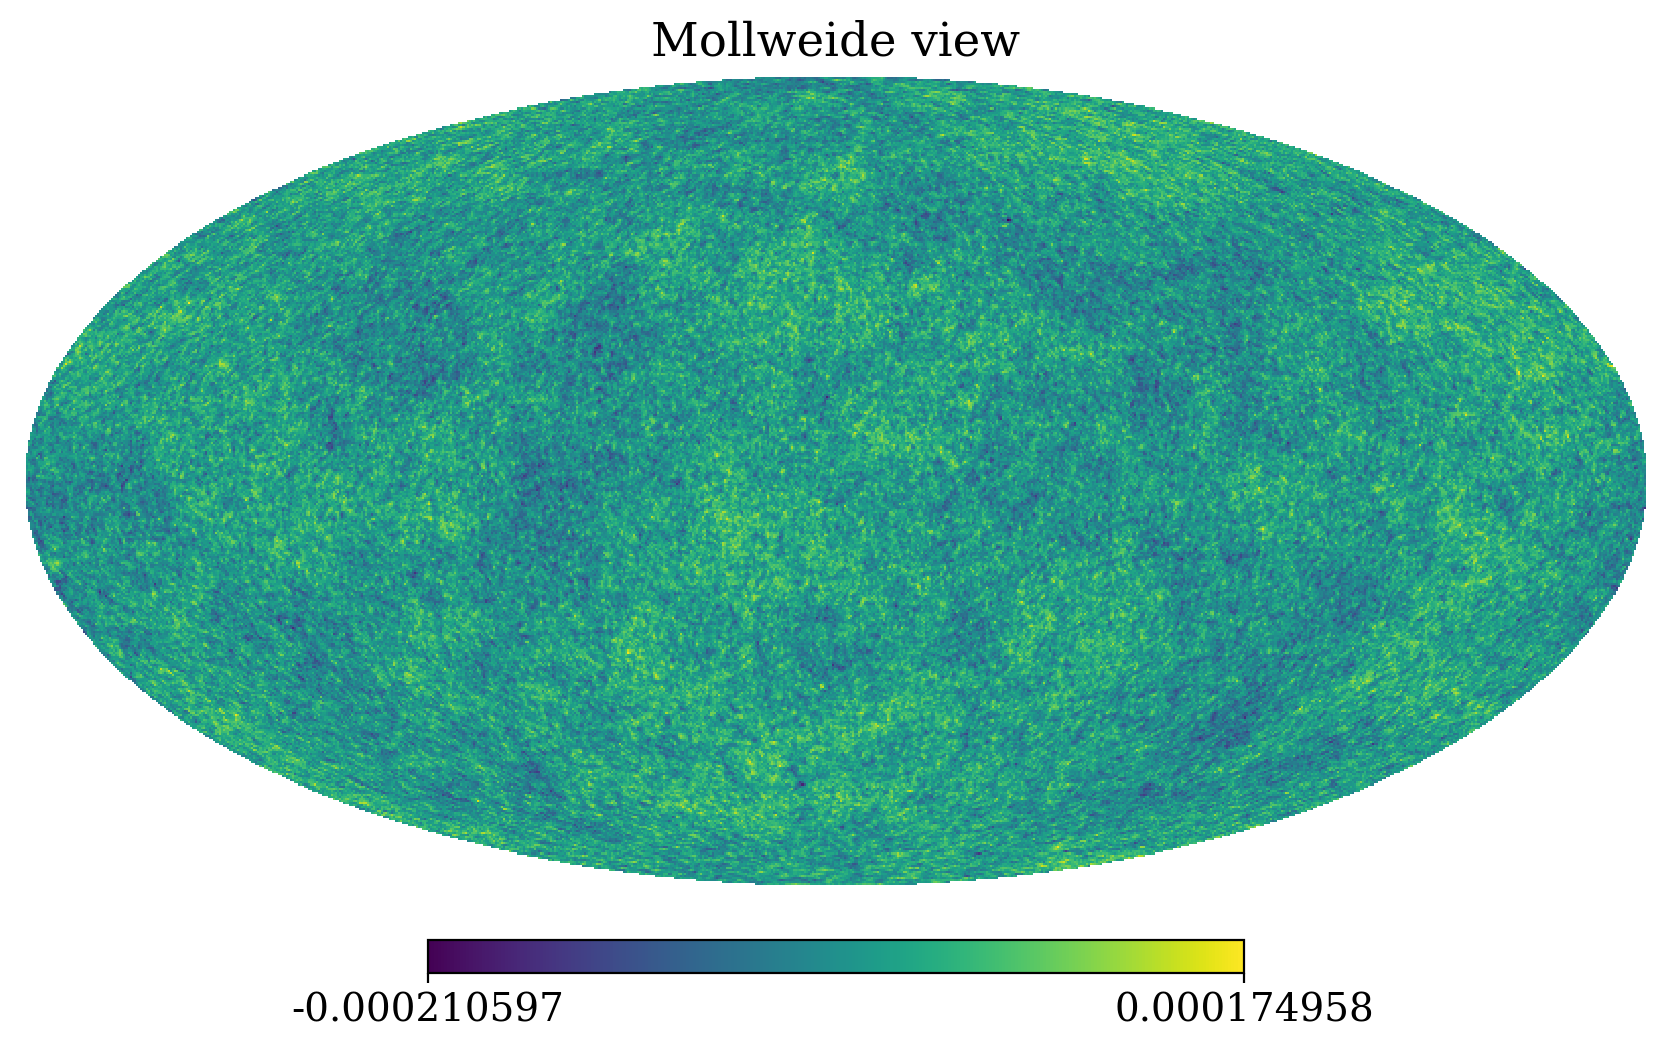

In [68]:
hp.mollview(cmbmap)
fig = plt.gcf()
mlai.write_figure('mollweide-sample-cmb.png',
                  directory='./physics/')

<img class="vertical-align:middle" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/mollweide-sample-cmb.png" style="width:50%">

Figure: <i>A simulation of the Cosmic Microwave Background obtained
through sampling from the relevant Gaussian process covariance (in polar
co-ordinates).</i>

The world we see today, of course, is not a Gaussian process. There are
many discontinuities, for example, in the density of matter, and
therefore in the temperature of the Universe.

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//earth_PNG37.png" width="20%" style="display:inline-block;background:none;vertical-align:middle;border:none;box-shadow:none;">$=f\Bigg($<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//Planck_CMB.png"  width="50%" style="display:inline-block;background:none;vertical-align:middle;border:none;box-shadow:none;">$\Bigg)$

Figure: <i>What we observe today is some non-linear function of the
cosmic microwave background.</i>

We can think of today’s observed Universe, though, as a being a
consequence of those temperature fluctuations in the CMB. Those
fluctuations are only order $10^{-6}$ of the scale of the overall
temperature of the Universe. But minor fluctuations in that density are
what triggered the pattern of formation of the Galaxies. They determined
how stars formed and created the elements that are the building blocks
of our Earth (Vogelsberger et al., 2020).

# The Universe isn’t as Gaussian as it Was

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_physics/includes/universe-gaussian.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_physics/includes/universe-gaussian.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Those cosmological simulations are based on a relatively simple set of
‘rules’ that stem from our understanding of natural laws. These ‘rules’
are mathematical abstractions of the physical world. Representations of
behavior in mathematical form that capture the interaction forces
between particles. The grand aim of physics has been to unify these
rules into a single unifying theory. Popular understanding of this quest
developed because of Stephen Hawking’s book, “[A Brief History of
Time](https://en.wikipedia.org/wiki/A_Brief_History_of_Time)”. The idea
of these laws as ‘ultimate causes’ has given them a pseudo religious
feel, see for example Paul Davies’s book “[The Mind of
God](https://en.wikipedia.org/wiki/The_Mind_of_God)” which comes from a
quotation form Stephen Hawking.

> If we do discover a theory of everything … it would be the ultimate
> triumph of human reason-for then we would truly know the mind of God
>
> Stephen Hawking in *A Brief History of Time* 1988

# Precise Physical Laws

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_physics/includes/precise-physical-laws.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_physics/includes/precise-physical-laws.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We’ve already reviewed the importance of Newton’s laws in forging our
view of science: we mentioned the influence [Christiaan
Huygens’](https://en.wikipedia.org/wiki/Christiaan_Huygens) work on
collisions had on Daniel Bernoulli in forming the kinetic theory of
gases. These ideas inform many of the physical models we have today
around a number of natural phenomena. The MET Office supercomputer in
Exeter spends its mornings computing the weather across the world its
afternoons modelling climate scenarios. It uses the same set of
principles that Newton described, and Bernoulli explored for gases. They
are encoded in the Navier-Stokes equations. Differential equations that
govern the flow of compressible and incompressible fluids. As well as
predicting our weather, these equations are used in fluid dynamics
models to understand the flight of aircraft, the driving characteristics
of racing cars and the efficiency of gas turbine engines.

## Abstraction and Emergent Properties

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_physics/includes/simulation-scales.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_physics/includes/simulation-scales.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/simulation-scales.svg" class="" width="90%" style="vertical-align:middle;">

Figure: <i>A scale of different simulations we might be interested in
when modelling the physical world. The scale is $\log_{10}$ meters. The
scale reflects something about the level of granularity where we might
choose to know “all positions of all items of which nature is
composed”.</i>

Unfortunately, even if such an equation were to exist, we would be
unlikely to know “all positions of all items of which nature is
composed”. A good example here is computational systems biology. In that
domain we are interested in understanding the underlying function of the
cell. These systems sit somewhere between the two extremes that Laplace
described: “the movements of the greatest bodies of the universe and
those of the smallest atom”.

When the smallest atom is considered, we need to introduce uncertainty.
We again turn to a different work of Maxwell, building on Bernoulli’s
kinetic theory of gases we end up with probabilities for representing
the location of the ‘molecules of air’. Instead of a deterministic
location for these particles we represent our belief about their
location in a distribution.

Computational systems biology is a world of micro-machines, built of
three dimensional foldings of strings of proteins. There are spindles
(stators) and rotors (e.g. [ATP
Synthase](https://en.wikipedia.org/wiki/ATP_synthase)), there are small
copying machines (e.g. [RNA
Polymerase](https://en.wikipedia.org/wiki/RNA_polymerase)) there are
sequence to sequence translators
([Ribosomes](https://en.wikipedia.org/wiki/Ribosome)). The cells store
information in DNA but have an ecosystem of structures and messages
being built and sent in proteins and RNA. Unpicking these structures has
been a major preoccupation of biology. That is knowing where the atoms
of these molecules are in the structure, and how the parts of the
structure move when these small micro-machines are carrying out their
roles.

We understand most (if not all) of the physical laws that drive the
movements of these molecules, but we don’t understand all the actions of
the cell, nor can we intervene reliably to improve things. So, even in
the case where we have a good understanding of the physical laws,
Laplace’s gremlin emerges in our knowledge of “the positions of all
items of which nature is composed”.

## Molecular Dynamics Simulations

By understanding and simulating the physics, we can recreate operations
that are happening at the level of proteins in the human cell.
[V-ATPase](https://en.wikipedia.org/wiki/V-ATPase) is an enzyme that
pumps protons. But at the microscopic level it’s a small machine. It
produces ATP in response to a proton gradient. A paper in *Science
Advances* (Roh et al., 2020) simulates the functioning of these proteins
that operate across the cell membrane. This makes these proteins
difficult to crystallize, the response to this challenge is to use a
simulation which (somewhat) abstracts the processes. You can also check
this [blog
post](https://www6.slac.stanford.edu/news/2020-10-07-first-detailed-look-how-molecular-ferris-wheel-delivers-protons-cellular-factories)
from the paper’s press release.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//sysbio/rotary_proton_sv_pump_anim_final.gif" style="width:40%">

Figure: <i>The V-ATPase enzyme pumps proteins across membranes. This
molecular dynamics simulation was published in *Science Advances* (Roh
et al., 2020). The scale is roughly $10^{-8} m$.</i>

## Quantum Mechanics

Alternatively, we can drop down a few scales and consider simulation of
the Schrödinger equation. Intractabilities in the many-electron
Schrödinger equation have been addressed using deep neural networks to
speed up the solution enabling simulation of chemical bonds (Pfau et
al., 2020). The [PR-blog post is also
available](https://deepmind.com/blog/article/FermiNet). The paper uses a
neural network to model the quantum state of a number of electrons.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/many-electron-schroedinger.gif" style="width:40%">

Figure: <i>The many-electron Schrödinger equation is important in
understanding how Chemical bonds are formed.</i>

Each of these simulations have the same property of being based on a set
of (physical) rules about how particles interact. But one of the
interesting characteristics of such systems is how the properties of the
system are emergent as the dynamics are allowed to continue.

These properties cannot be predicted without running the physics, or the
equivalently the equation. Computation is required. And often the amount
of computation that is required is prohibitive.

## How Machine Learning Can Help

Machine learning models can often capture some of the regularities of
the system that we find in these emergent properties. They do so, not
from first principles, but from analysis of the data. In the Atomic
Human, I argue that this has more in common with how human intellience
solves problems than through first-principles modelling. When it comes
to ML and the Physical World, the aim is to use machine learning models
alongside simulations to get the best of both worlds.

See Lawrence (2024) hooshing, Pooh’s law of p. 157-158,160.

# Conclusion

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/simulation-conclusion.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/simulation-conclusion.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We’ve introduced the notion of a simulator. A body of computer code that
expresses our understanding of a particular physical system. We
introduced such simulators through *physical laws*, such as laws of
gravitation or electro-magnetism. But we soon saw that in many
simulations those laws become abstracted, and the simulation becomes
more phenomological.

Even full knowledge of all laws does not give us access to ‘the mind of
God’, because we are lacking information about the data, and we are
missing the compute. These challenges further motivate the need for
abstraction, and we’ve seen examples of where such abstractions are used
in practice.

The example of Conway’s Game of Life highlights how complex emergent
phenomena can require significant computation to explore.

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References

Elsner, F., Leistedt, B., Peiris, H.V., 2016. Unbiased pseudo-$C_\ell$
power spectrum estimation with mode projection. Monthly Notices of the
Royal Astronomical Society 465, 1847–1855.
<https://doi.org/10.1093/mnras/stw2752>

Elsner, F., Leistedt, B., Peiris, H.V., 2015. Unbiased methods for
removing systematics from galaxy clustering measurements. Monthly
Notices of the Royal Astronomical Society 456, 2095–2104.
<https://doi.org/10.1093/mnras/stv2777>

Jaffe, A.H., Bond, J.R., Ferreira, P.G., Knox, L.E., 1998. CMB
likelihood functions for beginners and experts, in: AIP Conf. Proc.
<https://doi.org/10.1063/1.59329>

Lawrence, N.D., 2024. [The atomic human: Understanding ourselves in the
age of
AI](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248).
Allen Lane.

Mishra-Sharma, S., Cranmer, K., 2020. [Semi-parametric $\gamma$-ray
modeling with Gaussian processes and variational
inference](https://arxiv.org/abs/2010.10450).

Pfau, D., Spencer, J.S., Matthews, A.G.D.G., Foulkes, W.M.C., 2020. Ab
initio solution of the many-electron Schrödinger equation with deep
neural networks. Phys. Rev. Research 2, 033429.
<https://doi.org/10.1103/PhysRevResearch.2.033429>

Pontzen, A., Peiris, H.V., 2010. The cut-sky cosmic microwave background
is not anomalous. Phys. Rev. D 81, 103008.
<https://doi.org/10.1103/PhysRevD.81.103008>

Roh, S.-H., Shekhar, M., Pintilie, G., Chipot, C., Wilkens, S.,
Singharoy, A., Chiu, W., 2020. Cryo-EM and MD infer water-mediated
proton transport and autoinhibition mechanisms of Vo complex. Science
Advances 6. <https://doi.org/10.1126/sciadv.abb9605>

Stromquist, W.R., 1984. Packing unit squares inside squares, III. Daniel
H. Wagner Associates.

Vogelsberger, M., Marinacci, F., Torrey, P., Puchwei, E., 2020.
Cosmological simulations of galaxy formation. Nature Reviews Physics 2,
42–66. <https://doi.org/10.1038/s42254-019-0127-2>